# Discharge Data

In [13]:
import requests

import pandas as pd
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup

Greenland discharge data is readily available to download from the cloud from Ken Mankoff's _Greenland Ice Sheet solid ice discharge from 1986 through last month_ dataset. 

The most recent paper citation is:

> Mankoff, K. D., Solgaard, A., Colgan, W., Ahlstrøm, A. P., Khan, S. A., & Fausto, R. S. (2020). Greenland Ice Sheet solid ice discharge from 1986 through March 2020. _Earth System Science Data_, 12(2), 1367-1383. https://doi.org/10.5194/essd-12-1367-2020

And the dataset can be found at:

> Mankoff, K. D., Solgaard, A., & Larsen, S. (2020). Greenland Ice Sheet solid ice discharge from 1986 through last month: Discharge, _GEUS Dataverse_ https://doi.org/10.22008/promice/data/ice_discharge/d/v02

The dataset updates monthly with new discharge data and a new version. As well as the GEUS dataverse page, there is a specific page that always links to the most recent versions of the dataset, located at https://dataverse.geus.dk/api/datasets/:persistentId/dirindex?persistentId=doi:10.22008/promice/data/ice_discharge/d/v02. 

# Downloading Data

We can use this page to write a simple function that will get direct links to the most recent CSVs. This uses the standard library `requests` package, as well as "Beautiful Soup", a popular library for parsing HTML (i.e. web markup language).

In [14]:

def get_discharge_links():
    url = 'https://dataverse.geus.dk/api/datasets/:persistentId/dirindex?persistentId=doi:10.22008/promice/data/ice_discharge/d/v02'
    html = requests.get(url).text
    soup = BeautifulSoup(html, 'html.parser')
    return {a.text.strip(): "https://dataverse.geus.dk" + a["href"] for a in soup.find_all("a")}

links = get_discharge_links()

We now have a complete dictionary of the links, which I print out below.

In [ ]:
links

{'gate.nc': 'https://dataverse.geus.dk/api/access/datafile/93550',
 'gate_coverage.csv': 'https://dataverse.geus.dk/api/access/datafile/93547',
 'gate_D.csv': 'https://dataverse.geus.dk/api/access/datafile/93548',
 'gate_err.csv': 'https://dataverse.geus.dk/api/access/datafile/93549',
 'gate_meta.csv': 'https://dataverse.geus.dk/api/access/datafile/78366',
 'GIS.nc': 'https://dataverse.geus.dk/api/access/datafile/93554',
 'GIS_coverage.csv': 'https://dataverse.geus.dk/api/access/datafile/93551',
 'GIS_D.csv': 'https://dataverse.geus.dk/api/access/datafile/93552',
 'GIS_err.csv': 'https://dataverse.geus.dk/api/access/datafile/93553',
 'README.txt': 'https://dataverse.geus.dk/api/access/datafile/93146',
 'region.nc': 'https://dataverse.geus.dk/api/access/datafile/93558',
 'region_coverage.csv': 'https://dataverse.geus.dk/api/access/datafile/93555',
 'region_D.csv': 'https://dataverse.geus.dk/api/access/datafile/93556',
 'region_err.csv': 'https://dataverse.geus.dk/api/access/datafile/935

The `README.txt` outlines what each of the files are:

| Filename              | Description                                                            |
|-----------------------|------------------------------------------------------------------------|
| `GIS_D.csv`           | Greenland Ice Sheet cumulative discharge by timestamp                  |
| `GIS_err.csv`         | Errors for GIS_D.csv                                                   |
| `GIS_coverage.csv`    | Coverage for GIS_D.csv                                                 |
| `GIS.nc`              | Discharge, errors, and coverage for GIS                                |
| `region_D.csv`        | Regional discharge                                                     |
| `region_err.csv`      | Errors for region_D.csv                                                |
| `region_coverage.csv` | Coverage for region_D.csv                                              |
| `region.nc`           | Discharge, errors, and coverage for GIS regions                        |
| `sector_D.csv`        | Sector discharge                                                       |
| `sector_err.csv`      | Errors for sector_D.csv                                                |
| `sector_coverage.csv` | Coverage for sector_D.csv                                              |
| `sector.nc`           | Discharge, errors, and coverage for GIS sectors                        |
| `gate_D.csv`          | Gate discharge                                                         |
| `gate_err.csv`        | Errors for gate_D.csv                                                  |
| `gate_coverage.csv`   | Coverage for gate_D.csv                                                |
| `gate.nc`             | Discharge, errors, and coverage for GIS gates - including gate metadata|
| `gate_meta.csv`       | Metadata for each gate                                                 |

We can load the `.csv` files directly using Pandas, and begin to play.


## Greenland-wide Discharge

In [36]:
gis_d_df = pd.read_csv(links['GIS_D.csv'], parse_dates=['Date'])
gis_err_df = pd.read_csv(links['GIS_err.csv'], parse_dates=['Date'])
gis_df = pd.merge(gis_d_df, gis_err_df, on='Date', how='inner')

gis_df

Date  Discharge [Gt yr-1]  Discharge Error [Gt yr-1]
0    1986-04-15              426.529                     39.572
1    1986-05-15              437.313                     40.547
2    1986-06-15              443.186                     41.209
3    1986-07-15              444.473                     41.196
4    1986-08-15              442.602                     40.659
...         ...                  ...                        ...
2920 2025-07-03              494.212                     46.926
2921 2025-07-15              499.877                     47.389
2922 2025-07-27              491.225                     46.367
2923 2025-08-08              486.759                     45.928
2924 2025-08-20              491.769                     46.459

[2925 rows x 3 columns]

Text(0.5, 1.0, 'Greenland Ice Sheet Discharge')

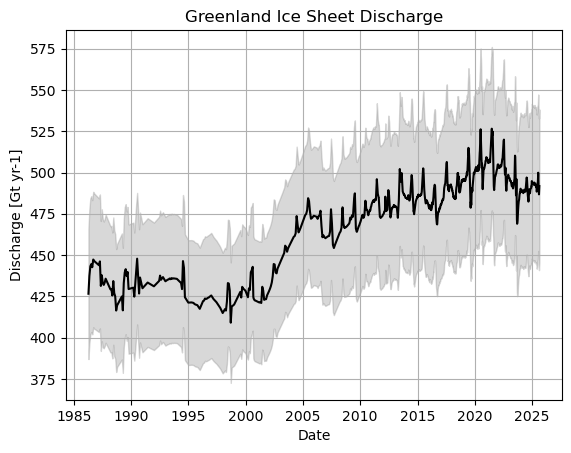

In [ ]:
fig, ax = plt.subplots()

# ax.errorbar(gis_df['Date'], gis_df['Discharge [Gt yr-1]'], yerr=gis_df['Discharge Error [Gt yr-1]'], capsize=5)

ax.plot(gis_df['Date'], gis_df['Discharge [Gt yr-1]'], color='black')
ax.fill_between(
    gis_df['Date'],
    gis_df['Discharge [Gt yr-1]'] - gis_df['Discharge Error [Gt yr-1]'],
    gis_df['Discharge [Gt yr-1]'] + gis_df['Discharge Error [Gt yr-1]'],
    color='grey', alpha=0.3
)

ax.grid()
ax.set_xlabel('Date')
ax.set_ylabel('Discharge [Gt yr-1]')
ax.set_title('Greenland Ice Sheet Discharge')

## Region Discharge

In [ ]:
region_d_df = pd.read_csv(links['region_D.csv'], parse_dates=['Date'])
region_d_df

Date         CE         CW         NE         NO          NW  \
0    1986-04-15  62.137103  68.260368  22.420875  21.088441   90.888020   
1    1986-05-15  62.681844  77.211197  22.551619  20.375301   91.876267   
2    1986-06-15  65.678520  76.699118  22.784760  23.760039   93.772264   
3    1986-07-15  65.633344  76.246051  20.908024  24.905824   95.793717   
4    1986-08-15  64.001971  74.264191  22.652118  23.707009   95.469182   
...         ...        ...        ...        ...        ...         ...   
2920 2025-07-03  77.428632  83.229713  30.684348  27.458049  117.777602   
2921 2025-07-15  76.549233  86.581371  31.374898  28.080070  119.337322   
2922 2025-07-27  74.588720  85.175539  31.497871  28.159406  114.859978   
2923 2025-08-08  73.874844  84.292667  31.709303  28.196223  114.246686   
2924 2025-08-20  75.351757  86.121670  31.249736  28.125413  115.976991   

              SE         SW  
0     141.065906  20.667821  
1     141.948529  20.667821  
2     139.823480  20.667821  
3     140.318272  20.667821  
4     141.839283  20.667821  
...          ...        ...  
2920  137.209408  20.424536  
2921  137.679265  20.274452  
2922  137.485715  19.457482  
2923  135.567358  18.872074  
2924  136.081063  18.862323  

[2925 rows x 8 columns]

Text(0.5, 1.0, 'Regional Greenland Ice Sheet Discharge')

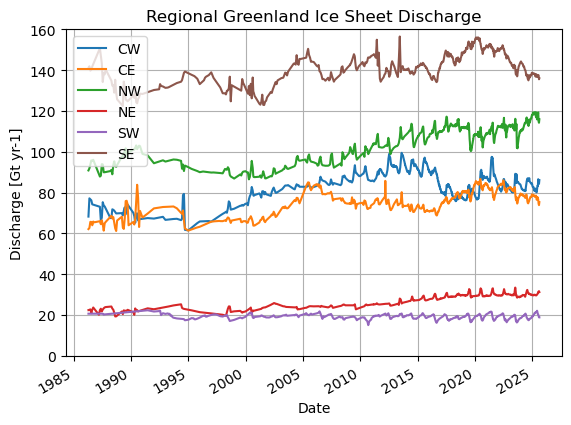

In [55]:
fig, ax = plt.subplots()

ax = region_d_df.plot(x='Date', y=['CW','CE','NW','NE','SW','SE'], ax=ax)

ax.grid()
ax.set_ylabel('Discharge [Gt yr-1]')
ax.set_ylim(0, 160)
ax.set_title('Regional Greenland Ice Sheet Discharge')


## Specific Basins

Divided into basins from [Mouginot and Rignot (2019)](https://datadryad.org/dataset/doi:10.7280/D1WT11).

In [57]:
sector_d_df = pd.read_csv(links['sector_D.csv'], parse_dates=['Date'])
sector_err_df = pd.read_csv(links['sector_err.csv'], parse_dates=['Date'])


We can see what basin names are available by printing the columns (or, in practice, probably by consulting the Mouginot and Rignot vector dataset in GIS software). I will leave this commented out for now so as now to produce a wall of text.

In [61]:
# for c in sector_d_df.columns:
#     print(c)

Let's get an example glaciers - KIV Steenstrup Norde Bræ (I have a [vested interest](https://doi.org/10.1038/s41467-023-37764-7)).

In [63]:
# KIV_STEENSTRUP_NODRE_BRAE
kiv_d_df = sector_d_df[['Date', 'KIV_STEENSTRUP_NODRE_BRAE']].rename(columns={"KIV_STEENSTRUP_NODRE_BRAE": "Discharge [Gt yr-1]"})
kiv_err_df = sector_err_df[['Date', 'KIV_STEENSTRUP_NODRE_BRAE']].rename(columns={"KIV_STEENSTRUP_NODRE_BRAE": "Discharge Error [Gt yr-1]"})
kiv_df = pd.merge(kiv_d_df, kiv_err_df, on='Date', how='inner')
kiv_df

Date  Discharge [Gt yr-1]  Discharge Error [Gt yr-1]
0    1986-04-15             5.528626                   0.172375
1    1986-05-15             5.442344                   0.169099
2    1986-06-15             5.883271                   0.197025
3    1986-07-15             6.258195                   0.204638
4    1986-08-15             5.526404                   0.176612
...         ...                  ...                        ...
2920 2025-07-03            10.241080                   0.364027
2921 2025-07-15            10.143594                   0.358980
2922 2025-07-27             9.781145                   0.348199
2923 2025-08-08             9.675594                   0.343677
2924 2025-08-20             9.700606                   0.343281

[2925 rows x 3 columns]

Text(0.5, 1.0, 'KIV Steenstrup Norde Bræ Discharge')

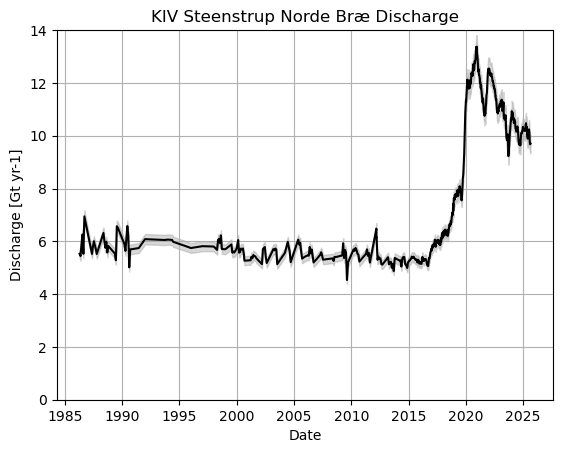

In [65]:
fig, ax = plt.subplots()

ax.plot(kiv_df['Date'], kiv_df['Discharge [Gt yr-1]'], color='black')
ax.fill_between(
    kiv_df['Date'],
    kiv_df['Discharge [Gt yr-1]'] - kiv_df['Discharge Error [Gt yr-1]'],
    kiv_df['Discharge [Gt yr-1]'] + kiv_df['Discharge Error [Gt yr-1]'],
    color='grey', alpha=0.3
)

ax.grid()
ax.set_ylim(0, 14)
ax.set_xlabel('Date')
ax.set_ylabel('Discharge [Gt yr-1]')
ax.set_title('KIV Steenstrup Norde Bræ Discharge')
